# Push-ups

In [27]:
import pandas as pd

df_pushup = pd.read_csv('231020_21h53m_train_scaled_with_label_only_angle_ver.csv')
df_pushup

,angle_right_arm,angle_left_arm,angle_right_leg,angle_left_leg,xy_angle_right_arm,xy_angle_left_arm,xy_angle_right_leg,xy_angle_left_leg,label
0,4.839921,2.060280,3.822668,2.667676,7.520909,7.343125,3.808894,3.824501,0
1,5.109820,2.232215,3.830378,3.024879,7.799889,7.470543,3.816605,3.609117,0
2,3.945768,1.687688,3.692830,2.949957,6.323186,6.435285,3.725182,3.595442,0
3,4.664057,6.587934,3.214495,3.080882,4.207613,4.741305,3.827895,3.472650,4
4,3.005868,5.943385,3.574402,3.669662,4.319027,2.793003,3.924824,3.182336,4
...,...,...,...,...,...,...,...,...,...
603,3.664198,2.095557,0.897147,3.408949,5.774056,5.856086,0.320804,3.538462,3
604,2.571521,1.709853,0.998612,2.400530,4.349452,4.519678,0.514939,2.435328,2
605,3.240712,1.787738,0.565305,2.887901,5.034888,5.148997,0.405342,2.968946,2
606,2.682319,2.051359,0.700386,2.632107,4.334616,4.895456,0.481344,2.895726,2


In [28]:
X_labeled = df_pushup.drop('label', axis=1)
y_labeled = df_pushup['label']
X_labeled.shape, y_labeled.shape

((608, 8), (608,))

In [42]:
# 0, 5는 0으로, 1, 4는 1로, 2, 3은 2로
y_labeled = y_labeled.replace([1, 4], 1)
y_labeled = y_labeled.replace([0, 5], 0)
y_labeled = y_labeled.replace([2, 3], 2)
# y_labeled = y_labeled.replace(7, 0)
# y_labeled = y_labeled.replace(8, 1)
# y_labeled = y_labeled.replace(9, 2)

In [4]:
# 1, 4는 0으로, 0, 5는 1로, 2, 3은 2로
# y_labeled = y_labeled.replace([1, 4], 7)
# y_labeled = y_labeled.replace([0, 5], 8)
# y_labeled = y_labeled.replace([2, 3], 9)
# y_labeled = y_labeled.replace(7, 0)
# y_labeled = y_labeled.replace(8, 1)
# y_labeled = y_labeled.replace(9, 2)

In [43]:
y_labeled[y_labeled == 0].count(), y_labeled[y_labeled == 1].count(), y_labeled[y_labeled == 2].count(), y_labeled[y_labeled == 3].count(), y_labeled[y_labeled == 4].count(), y_labeled[y_labeled == 5].count()

(266, 224, 118, 0, 0, 0)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

In [45]:
y_labeled.unique()

array([0, 1, 2])

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_6labels = KNeighborsClassifier(n_neighbors=6)
knn_classifier_6labels.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
# from sklearn.neighbors import KNeighborsClassifier

knn_classifier_3labels = KNeighborsClassifier(n_neighbors=3)
knn_classifier_3labels.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
import xgboost as xgb

xbc = xgb.XGBClassifier(
    n_estimators=100,  # 트리 개수 (나무 개수)
    max_depth=3,       # 트리의 최대 깊이
    learning_rate=0.1, # 학습률 (보통 작은 값을 선택)
    random_state=42    # 랜덤 시드
)

# 모델 학습
xbc.fit(X_train, y_train)

/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
from sklearn.ensemble import VotingClassifier

# 앙상블 모델 정의 (다수결 투표)
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn_classifier_3labels),
        ('rfc', rfc),
        ('xbc', xbc)
    ],
    voting='hard'
)

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rfc', RandomForestClassifier()),
                             ('xbc',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...icy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

In [50]:
from sklearn.metrics import accuracy_score


y_pred = ensemble_model.predict(X_test)

# 분류 결과 출력
print("데이터의 예측 결과:", y_pred)

# 정확도 출력
print("정확도:", accuracy_score(y_test, y_pred))

데이터의 예측 결과: [1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 0 0 0 0 0 1 2 0 0 1 2 0 0 0 2 2 2 1
 0 1 1 2 0 0 0 0 1 0 2 0 2 2 2 0 1 2 2 0 0 2 0 2 1 0 0 0 0 2 2 0 2 2 0 2 1
 0 0 0 2 1 1 1 0 1 1 0 0 1 2 0 1 1 2 0 0 0 1 0 2 1 0 0 0 0 0 0 0 1 0 2 2 0
 1 2 1 1 0 0 1 1 0 2 0]
정확도: 0.9918032786885246


/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hou27/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

In [39]:
y_test[y_test == 0].count(), y_test[y_test == 1].count(), y_test[y_test == 2].count(), y_test[y_test == 3].count(), y_test[y_test == 4].count(), y_test[y_test == 5].count()

(59, 19, 6, 21, 12, 5)

In [51]:
print(y_pred[y_test!= y_pred])
print(y_test[y_test!= y_pred])

[2]
287    1
Name: label, dtype: int64


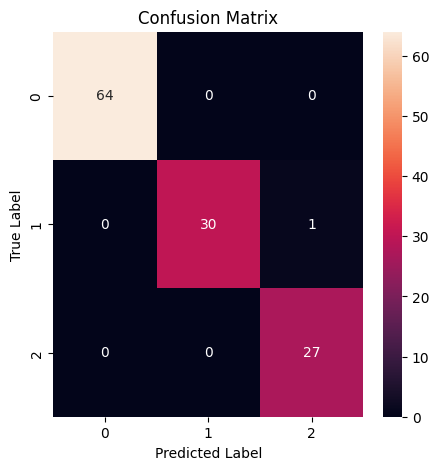

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      0.97      0.98        31
           2       0.96      1.00      0.98        27

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



In [52]:
from sklearn.metrics import confusion_matrix, f1_score


confusion_matrix(y_test, y_pred)
# f1_score(y_test, y_pred, average='weighted')

# plot confusion matrix and scores
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# # f1 score
# from sklearn.metrics import f1_score
# print('f1 score: ', f1_score(y_test, y_pred))